In [59]:
using Pkg; Pkg.activate(".")
using Plots
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include("bnc_initialize.jl")

  Activating project at `/mnt/d/Non-implementary-index/bnc_julia`


show_qK_space_conditions (generic function with 1 method)

In [2]:
# #binding
N = [1 1 -1]
x_sym = [:E, :S, :C]
q_sym = [:tE, :tS]
K_sym = [:K]

model = Bnc(N = N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

Bnc([1 1 -1], [1 0 1; 0 1 1], 1, 3, 2, Num[E, S, C], Num[tE, tS], Num[K], -1, nothing, nothing, nothing, nothing, nothing, [0.0, 0.0, 0.0], [0.3010299956639812, 0.3010299956639812, 0.0], true, sparse([1, 3, 2, 3], [1, 1, 2, 2], [1.0, 1.0, 1.0, 1.0], 3, 2), sparse([1, 3, 2, 3, 1, 2, 3], [1, 1, 2, 2, 3, 3, 3], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0], 3, 3), SparseArrays.UMFPACK.UmfpackLU{Float64, Int64}(SparseArrays.UMFPACK.Symbolic{Float64, Int64}(Ptr{Nothing} @0x00000000323afc50), SparseArrays.UMFPACK.Numeric{Float64, Int64}(Ptr{Nothing} @0x000000003219b6c0), 3, 3, [0, 2, 4, 7], [0, 2, 1, 2, 0, 1, 2], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0], 0, SparseArrays.UMFPACK.UmfpackWS{Int64}([4294967297, 1, 124765086146384], [0.0, 0.0, 6.1642142739306e-310]), [1.0, 0.2, 0.2, 0.1, 32.0, 0.0, 0.7, 0.0, 1.0, 0.3, 1.0, 1.0, 0.9, 0.0, 10.0, 0.001, 1.0, 0.5, 0.0, 1.0], [0.0, 3.0, 7.0, 16.0, 4.0, 8.0, 8.0, 8.0, 0.0, 0.0  …  -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], ReentrantLock(nothing, 0

In [144]:
# add labels to the regimes
function label(data)
    # Get the unique items from the input data
    items = unique(data)
    # Initialize an empty dictionary. Julia will infer the types.
    group_map = Dict() 
    # Enumerate the unique items and assign an integer label to each
    for (i, item) in enumerate(items)
        # Use assignment (=) instead of the pair operator (=>)
        group_map[item] = i 
    end
    return group_map
end

# # generate random x,with fixed K=1
# x = begin
#     es = randomize((10000,2))
#     c = es[:,1] .* es[:,2]
#     hcat(es, c)
# end
# # Calculate q
# q = x2qK(model,x',only_q=true)'



logq_rg = -2:(4/100):2
q = collect(Base.product(exp10.(logq_rg), exp10.(logq_rg)))
shape = size(q)
q = stack(q[:],dims=1)

# q = begin
#     rg1 = exp10.(-2:(4/100):2)
#     q = collect(Base.product(rg1,rg1))
#     stack(q[:],dims=1)
# end   # Generate random q values

x = qK2x(model,q',K=[1])'
# Find the regime of x
regimes = get_regime(model, x, q)
regime_labels = label(regimes)
labels = map(g-> regime_labels[g], regimes)
labels_lattice = reshape(labels, shape)


101×101 Matrix{Int64}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1     3  3  3  3  3  3  3  3  3  3  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1   

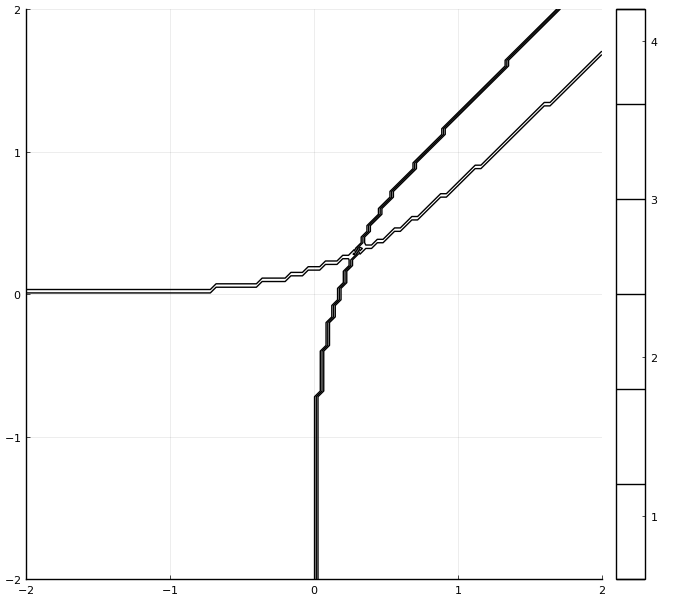

In [155]:
using Plots; pythonplot()
contour(logq_rg, logq_rg, labels_lattice, color=[:black],
    levels=4,size = (700,600))

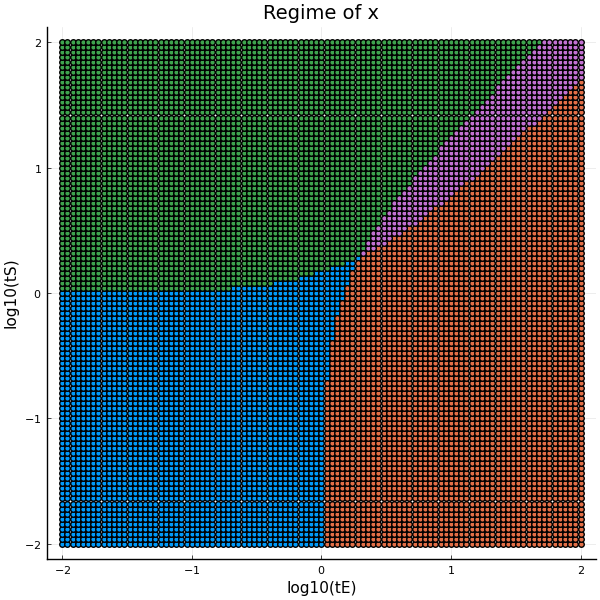

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [147]:
scatter(log10.(q[:,1]), log10.(q[:,2]),group=regimes, legend=false, xlabel="log10(tE)", ylabel="log10(tS)", title="Regime of x",size=(600,600))

In [114]:
y

10201-element Vector{Float64}:
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0
  ⋮
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

In [ ]:



x = log10.(q[:,1])
y = log10.(q[:,2])
z = Vector{Float64}(labels)
contourf(x, y, z)